In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
df_train.shape

(38932, 5)

In [5]:
df_train.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id10851,Was a little worried about choosing this place...,Firefox,Desktop,happy
freq,1,1,7367,15026,26521


In [6]:
df_train.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10851,1
Description,38932,38932,Was a little worried about choosing this place...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


# EDA Analysis & Performing Data Cleaning

In [7]:
df_train.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [8]:
df_train.nunique()

User_ID         38932
Description     38932
Browser_Used       11
Device_Used         3
Is_Response         2
dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [10]:
print(round(df_train.Is_Response.value_counts(normalize=True)*100,2))

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


Text(0.5, 1.0, 'Reviews Percentage (Happy / Not-Happy)')

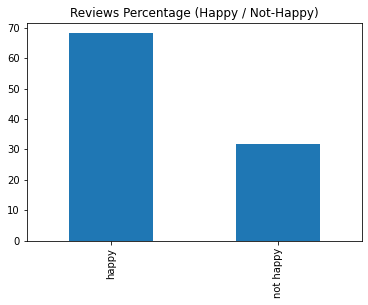

In [11]:
round(df_train.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title("Reviews Percentage (Happy / Not-Happy)")

In [12]:
df_train.drop(['User_ID', 'Browser_Used', 'Device_Used'], axis=1, inplace=True)

In [13]:
df_train.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [14]:
df_train.rename(columns = {'Description':'Reviews', 'Is_Response':'Liked'}, inplace=True)

In [15]:
df_train.head()

,Reviews,Liked
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [77]:
def clean_review(a):
    a = a.lower()
    a = re.sub('\w*\d\w*', '', a)
    a = re.sub('[%s]' % re.escape(string.punctuation), '', a)
    a = re.sub('\[.*?\]', '', a)
    a = re.sub('[‘’“”…]', '', a)
    a = re.sub('\n', '', a)
    return a
clean_reviews = lambda x: clean_review(x)

In [78]:
df_train['Clean_Reviews'] = pd.DataFrame(df_train.Reviews.apply(clean_review))

In [79]:
df_train.head()

,Reviews,Liked,Clean_Reviews,Liked_Label
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,0
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,0
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,0
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,1
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,0


# Training Model & Used Pipeline

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.model_selection import train_test_split

Independent_var = df_train.Clean_Reviews
Dependent_var = df_train.Liked

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 29199
IV_test  : 9733
DV_train : 29199
DV_test  : 9733


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [24]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[6231,  723],
       [ 395, 2384]], dtype=int64)

# Prediction

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.885133052501798
Precision :  0.8909660373109543
Recall :  0.885133052501798


In [28]:
user_review = ["the room was nice. but the floor was preety clean. food was tasty"]
review = model.predict(user_review)
review = ' '.join([str(elem) for elem in review])
print(f"Customer is {str(review)}")

Customer is happy


In [31]:
df_train["Liked_Label"]=np.where(df_train["Liked"]=="happy", 1, 0)

In [32]:
df_train.head()

,Reviews,Liked,Clean_Reviews,Liked_Label
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,0
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,0
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,0
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,1
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,0


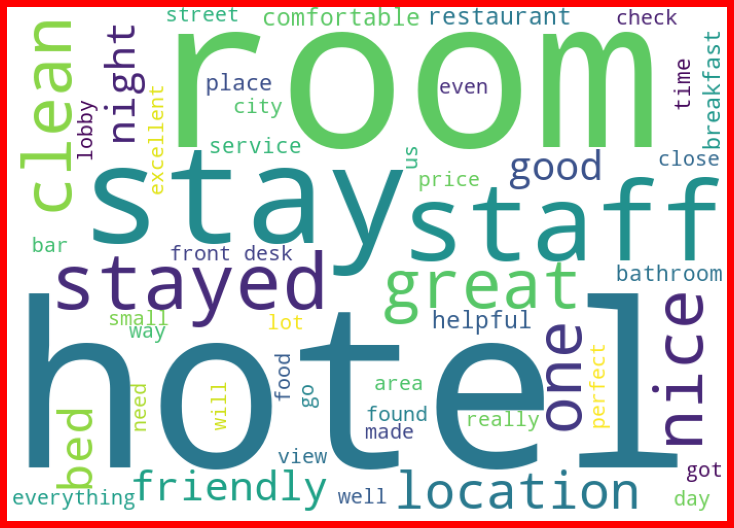

In [33]:
from wordcloud import WordCloud
positive = df_train['Clean_Reviews'][df_train['Liked_Label']==1]
p_sentiment = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(positive))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(p_sentiment)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

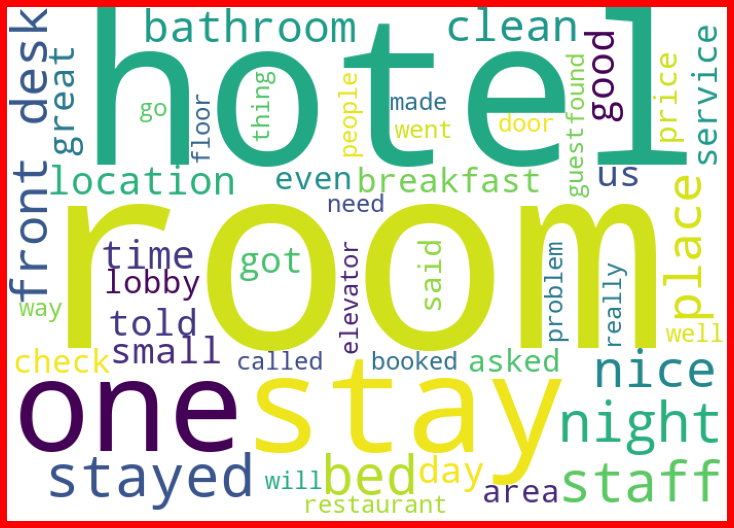

In [34]:
negative = df_train['Clean_Reviews'][df_train['Liked_Label']==0]
n_sentiment = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(negative))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(n_sentiment)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Used Test Dataset to Analyse Own Hotel Reviews Sentiments

In [66]:
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [67]:
df_test.drop(['User_ID', 'Browser_Used', 'Device_Used'], axis=1, inplace=True)

In [70]:
df_test.head()

,Description
0,Looking for a motel in close proximity to TV t...
1,Walking distance to Madison Square Garden and ...
2,Visited Seattle on business. Spent - nights in...
3,This hotel location is excellent and the rooms...
4,This hotel is awesome I love the service Antho...


In [71]:
df_test.shape

(29404, 1)

In [72]:
user_review = df_test.Description
review = model.predict(user_review)

In [73]:
df_test.join(pd.DataFrame(data={'Status':review}))

,Description,Status
0,Looking for a motel in close proximity to TV t...,not happy
1,Walking distance to Madison Square Garden and ...,happy
2,Visited Seattle on business. Spent - nights in...,happy
3,This hotel location is excellent and the rooms...,not happy
4,This hotel is awesome I love the service Antho...,happy
...,...,...
29399,I stayed at the hotel and towers for a confere...,happy
29400,Trying to stay within the Marriott family and ...,happy
29401,"We stayed for - nights with our little dog,ver...",happy
29402,Stayed at the Yotel over the weekend and was v...,happy
